In [34]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

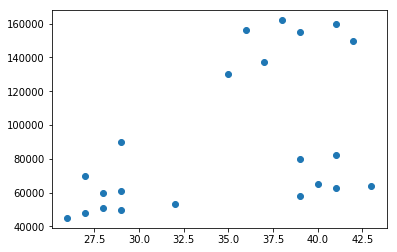

In [68]:
df = pd.read_csv("income.csv")
plt.scatter(df['Age'],df['Income($)'])



In [72]:
clf = KMeans(n_clusters=3)

scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])


df['Income($)']  = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


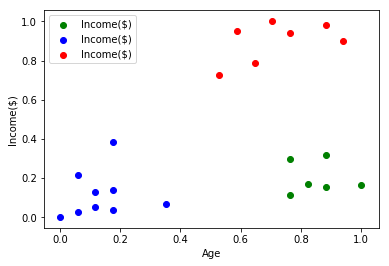

In [87]:
y_predict = clf.fit_predict(df[['Age','Income($)']])

df['cluster'] = y_predict

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.figure()

plt.scatter(df1.Age,df1['Income($)'],color="green")
plt.scatter(df2.Age,df2['Income($)'],color="blue")
plt.scatter(df3.Age,df3['Income($)'],color="red")

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

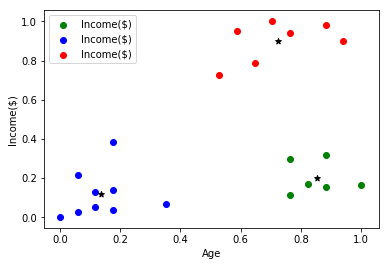

In [90]:
# Lets marks the cluster Center

clf.cluster_centers_

plt.scatter(df1.Age,df1['Income($)'],color="green")
plt.scatter(df2.Age,df2['Income($)'],color="blue")
plt.scatter(df3.Age,df3['Income($)'],color="red")
plt.scatter(clf.cluster_centers_[:,0],clf.cluster_centers_[:,1],color="black",marker='*')

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

Text(0, 0.5, 'sum sequred error(SSE)')

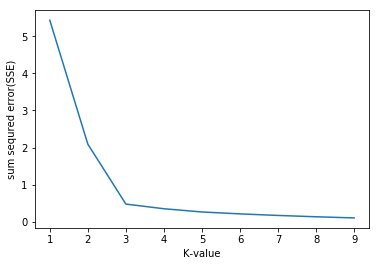

In [101]:
# Elbow technique
'''in the real world we have around more than 10 feature parameter so it is 
very difficult to plot on scatter plot ,here we use "Elbow technique" to get efficent value of K '''

k_range = range(1,10)
sse = []  # sequred sum error

for k in k_range:
    clf = KMeans(n_clusters=k)
    clf.fit(df[['Age','Income($)']])
    sse.append(clf.inertia_)
    

plt.plot(k_range,sse)
plt.xlabel("K-value")
plt.ylabel("sum sequred error(SSE)")

# our efficient K-value is present at Elbow Postion of graph , Here(i.e 3)
